<a href="https://colab.research.google.com/github/fernandoGitHub/ML_Projects/blob/main/Metrology_Dataset_Generator" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
columns = ['Age', 'Experience', 'Certification', 'Territory', 'HW Brand', 'SW Brand', 'Company Type']

In [4]:
cluster_1 = [(55, 20), (25,10), (2, 1.0), (1, 0.8), (1, 2), (1, 0.5), (1.5, 2)]
cluster_2 = [(30, 5), (10, 5), (2.5, 1.0), (2, 0.8), (2, 1), (4, 1), (2, 2)]

In [5]:
age_bins = ["20-35", '36-50', '50-65']

experience_bins = ['0-5', '6-15', '15-30', '30-40']

certification_bins = ['H.S.', 'B.SC.', 'M.SC.', 'PhD']

territory_bins = ['US', 'China', 'EMEA', 'S.A.']

HW_brand_bins = ['Bridge', 'Gant-tree', 'Dual-Arm']

SW_brand_bins = ['PCD', 'QUINDOS', 'CALYPSO', 'Other']

company_bins = ['Automotive OEM', 'Automotive Tier', 'Aerospace', 'Services']

In [6]:
def calc_biased_randn(median, skew, low,  high):
  res = np.random.randn() * (high-low) * skew + median
  res = min(res, high-0.01)
  res = max(low, res)

  return int(res)

In [7]:
customers_array = []
customers_array_num = []

for i in range(150):
  age = calc_biased_randn(median=cluster_1[0][0], skew=cluster_1[0][1], low=18, high=70)
  experience = calc_biased_randn(median=cluster_1[1][0], skew=cluster_1[1][1], low=0, high=35)
  certification = calc_biased_randn(median=cluster_1[2][0], skew=cluster_1[2][1], low=0, high=4)
  territory = calc_biased_randn(median=cluster_1[3][0], skew=cluster_1[3][1], low=0, high=4)
  hw_brand = calc_biased_randn(median=cluster_1[4][0], skew=cluster_1[4][1], low=0, high=3)
  sw_brand = calc_biased_randn(median=cluster_1[5][0], skew=cluster_1[5][1], low=0, high=4)
  company = calc_biased_randn(median=cluster_1[6][0], skew=cluster_1[6][1], low=0, high=4)
  customers_array_num.append([age, experience, certification, territory, hw_brand, sw_brand, company])

  certification = certification_bins[certification]
  territory = territory_bins[territory]
  hw_brand = HW_brand_bins[hw_brand]
  sw_brand = SW_brand_bins[sw_brand]
  company = company_bins[company]
  
  customers_array.append([age, experience, certification, territory, hw_brand, sw_brand, company])

In [8]:
users_df = pd.DataFrame(columns=columns, data=customers_array)
users_df_num = pd.DataFrame(columns=columns, data=customers_array_num)

In [9]:
users_df.head()

,Age,Experience,Certification,Territory,HW Brand,SW Brand,Company Type
0,18,0,B.SC.,EMEA,Dual-Arm,PCD,Automotive OEM
1,69,34,H.S.,China,Bridge,PCD,Services
2,18,34,PhD,S.A.,Dual-Arm,PCD,Services
3,69,0,M.SC.,China,Bridge,QUINDOS,Services
4,18,34,H.S.,China,Dual-Arm,Other,Automotive OEM


In [10]:
users_df_num.head()

,Age,Experience,Certification,Territory,HW Brand,SW Brand,Company Type
0,18,0,1,2,2,0,0
1,69,34,0,1,0,0,3
2,18,34,3,3,2,0,3
3,69,0,2,1,0,1,3
4,18,34,0,1,2,3,0


In [11]:
users_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,150.0,43.906667,25.292742,18.0,18.0,55.0,69.0,69.0
Experience,150.0,17.626667,16.848933,0.0,0.0,33.0,34.0,34.0


In [12]:
users_df_num.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,150.0,43.906667,25.292742,18.0,18.0,55.0,69.0,69.0
Experience,150.0,17.626667,16.848933,0.0,0.0,33.0,34.0,34.0
Certification,150.0,1.613333,1.394075,0.0,0.0,2.0,3.0,3.0
Territory,150.0,1.226667,1.316629,0.0,0.0,1.0,3.0,3.0
HW Brand,150.0,1.113333,0.966115,0.0,0.0,2.0,2.0,2.0
SW Brand,150.0,0.873333,1.119064,0.0,0.0,0.0,2.0,3.0
Company Type,150.0,1.373333,1.440296,0.0,0.0,1.0,3.0,3.0


In [13]:
from sklearn import metrics
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')


In [14]:
def find_clusters_by_KMeans(n_clusters, max_iter, data):
  kmeans_model = KMeans(n_clusters=n_clusters, max_iter=max_iter).fit(data)

  score = metrics.silhouette_score(data, kmeans_model.labels_)
  centroids = kmeans_model.cluster_centers_
  labels = kmeans_model.labels_

  return kmeans_model, centroids, labels, score

In [15]:
results = {}
for i in range(2, 10):
  kmeans_model, centroids, labels, score = find_clusters_by_KMeans(n_clusters=i, max_iter=10000, data=customers_array_num)
  results[i] = {'model':kmeans_model, 'centroids':centroids, 'labels':labels, 'score':score}

In [16]:
x = []
y = []
for i, (key, value) in enumerate(results.items()):
  x.append(key)
  y.append(value['score'])

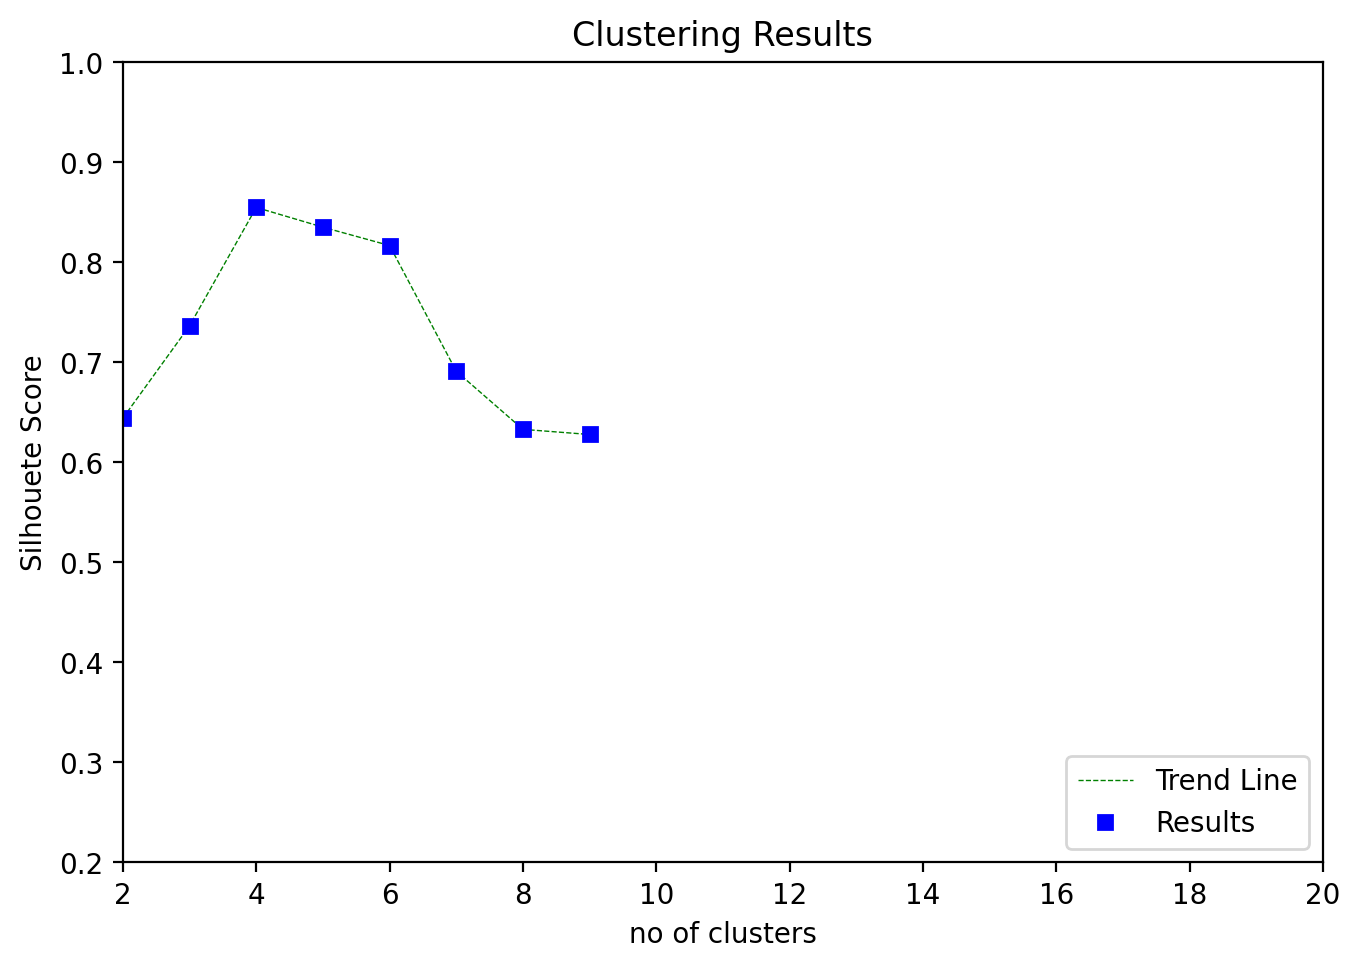

In [17]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(6,4),dpi=200)
ax = fig.add_axes([0, 0, 1, 1])

ax.plot(x, y, 'g--', lw=0.5, label='Trend Line')
ax.plot(x, y, 'b', lw=0, ms=5, marker='s', label='Results')
ax.set_xlabel('no of clusters')
ax.set_ylabel('Silhouete Score')
ax.set_title('Clustering Results')
ax.legend(loc=4)

plt.xlim(2, 20)
plt.ylim(0.2, 1.0);

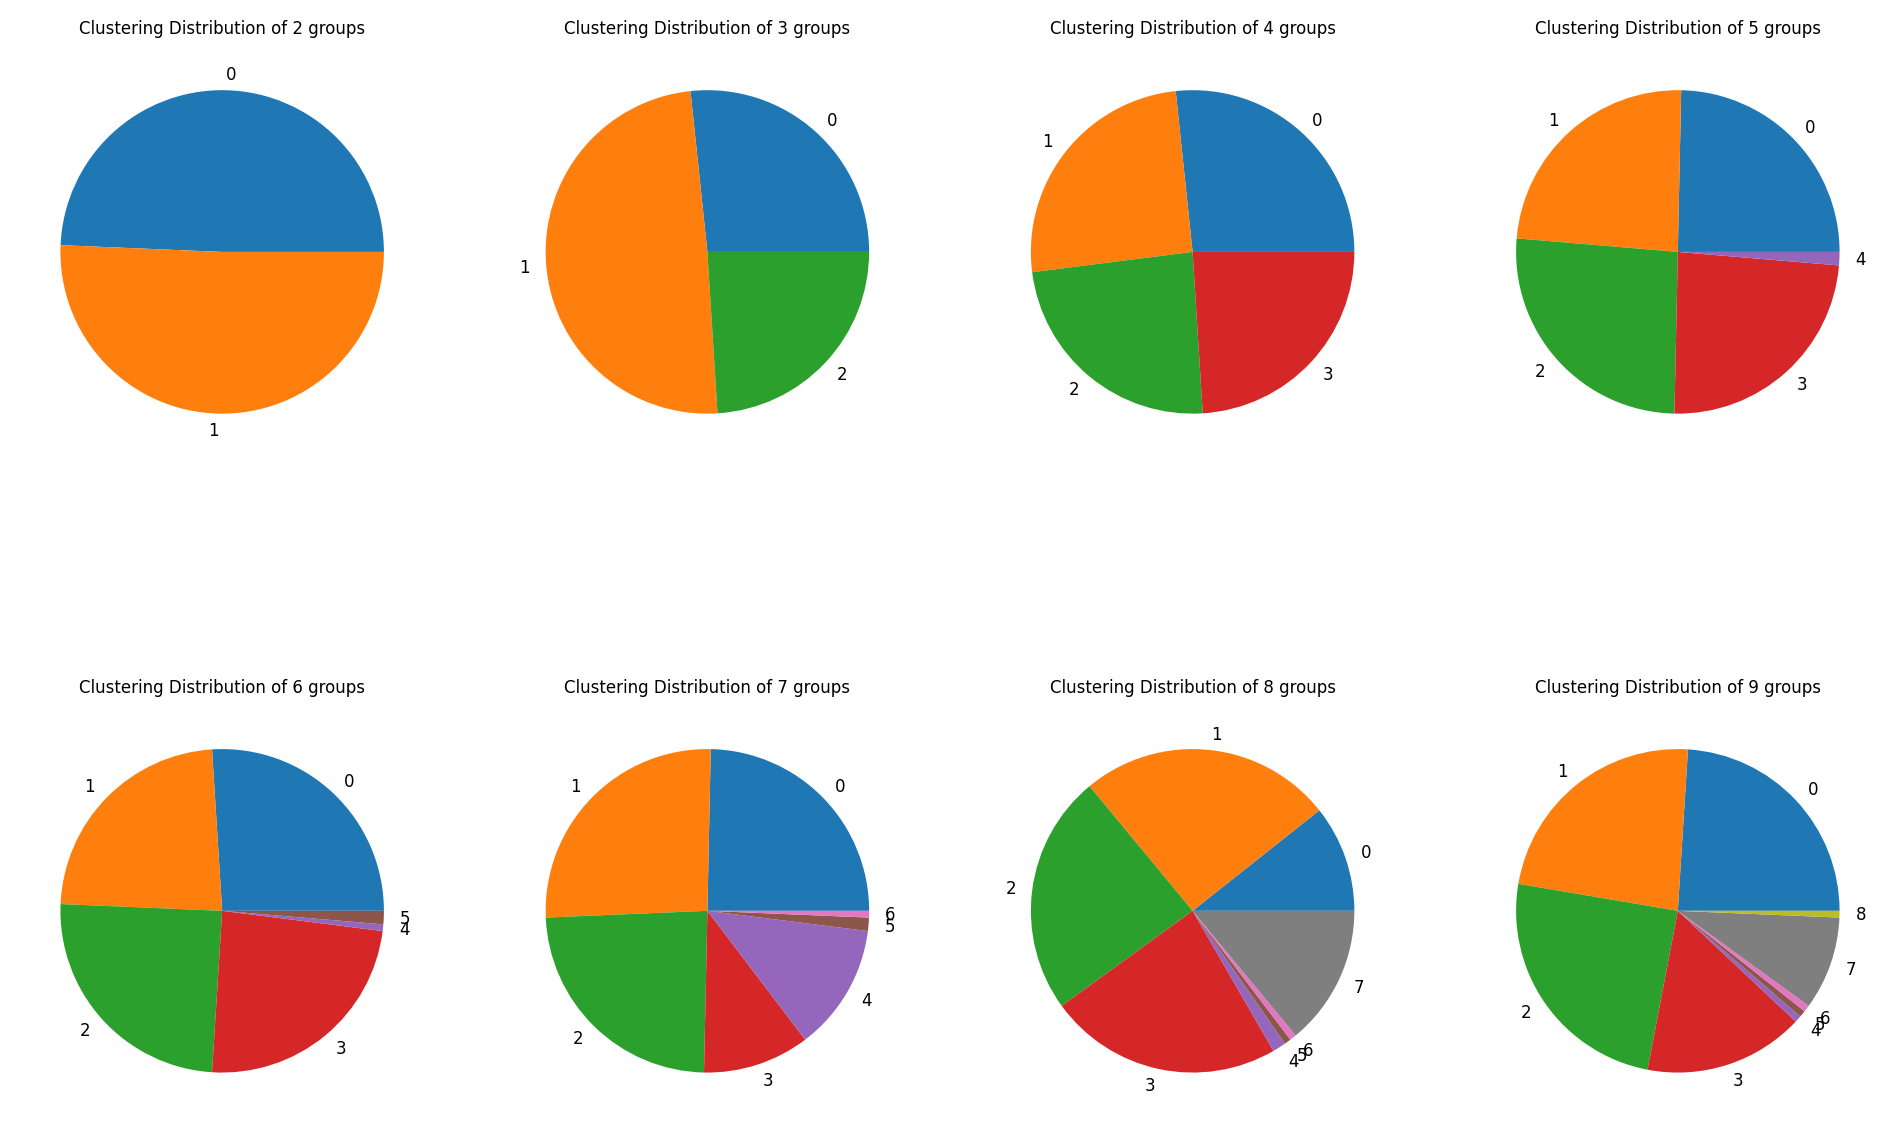

In [18]:
# 1 - Review results for selected clusterization cases and select most promising case
from IPython.display import clear_output

# Let's add n = 4 & n = 5 to make it more interesting
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(12,8),dpi=200);

for n in range (2, 9+1):
  values = results[n]
  labels = values['labels']
  unique, counts = np.unique(labels, return_counts=True)

  i = int((n-2)/4)
  j = (n-2)%4
  axes[i][j].pie(counts, labels = unique, textprops={'fontsize': 6});
  axes[i][j].set_title(f'Clustering Distribution of {n} groups', fontsize=6);

clear_output(wait=True)

In [48]:
def plot_relationships(values, relationships):

  labels = values['labels']
  centroids = values['centroids']
  unique, counts = np.unique(labels, return_counts=True)

  fig, axes = plt.subplots(nrows=len(relationships), ncols=1, figsize=(12,28),dpi=100)

  for i, rel in enumerate(relationships):
    # Scattering data
    x = users_df[rel[0]]
    y = users_df[rel[1]]

    xy = []
    for l in range(len(x)):
      xy.append([x[l], y[l], labels[l]])
    
    s = [1] * len(xy)
    for l in range(len(xy)):
      s[l] = 20*xy.count([x[l], y[l], labels[l]])
    
    ax = axes[i]
    ax.scatter(x, y, label='Cluster Data', c=labels, s=s, cmap=matplotlib.colors.ListedColormap(colors), alpha=0.75)

    # Projecting centroids to 2-D coordinates
    ix = users_df.columns.get_loc(rel[1])
    iy = users_df.columns.get_loc(rel[0])
    cx = []
    cy = []
    for j in range(n):
      cx.append(centroids[j][ix])
      cy.append(centroids[j][iy])
    
    ax.plot(cx, cy, 'r', lw=0, ms=10, marker='s', label='Centroids')
    
    for k in range(n):
      ax.annotate(k, (cx[k] + 7, cy[k] + 7), fontsize=15)

    ax.set_title(f'{rel[1]} against {rel[0]}')
    ax.set_ylabel(rel[0])
    ax.set_xlabel(rel[1])
    ax.legend()

  plt.subplots_adjust(left=0.1,
                      bottom=0.1, 
                      right=0.9, 
                      top=0.9, 
                      wspace=0.4, 
                      hspace=0.4)
  plt.tight_layout()
  clear_output(wait=True)

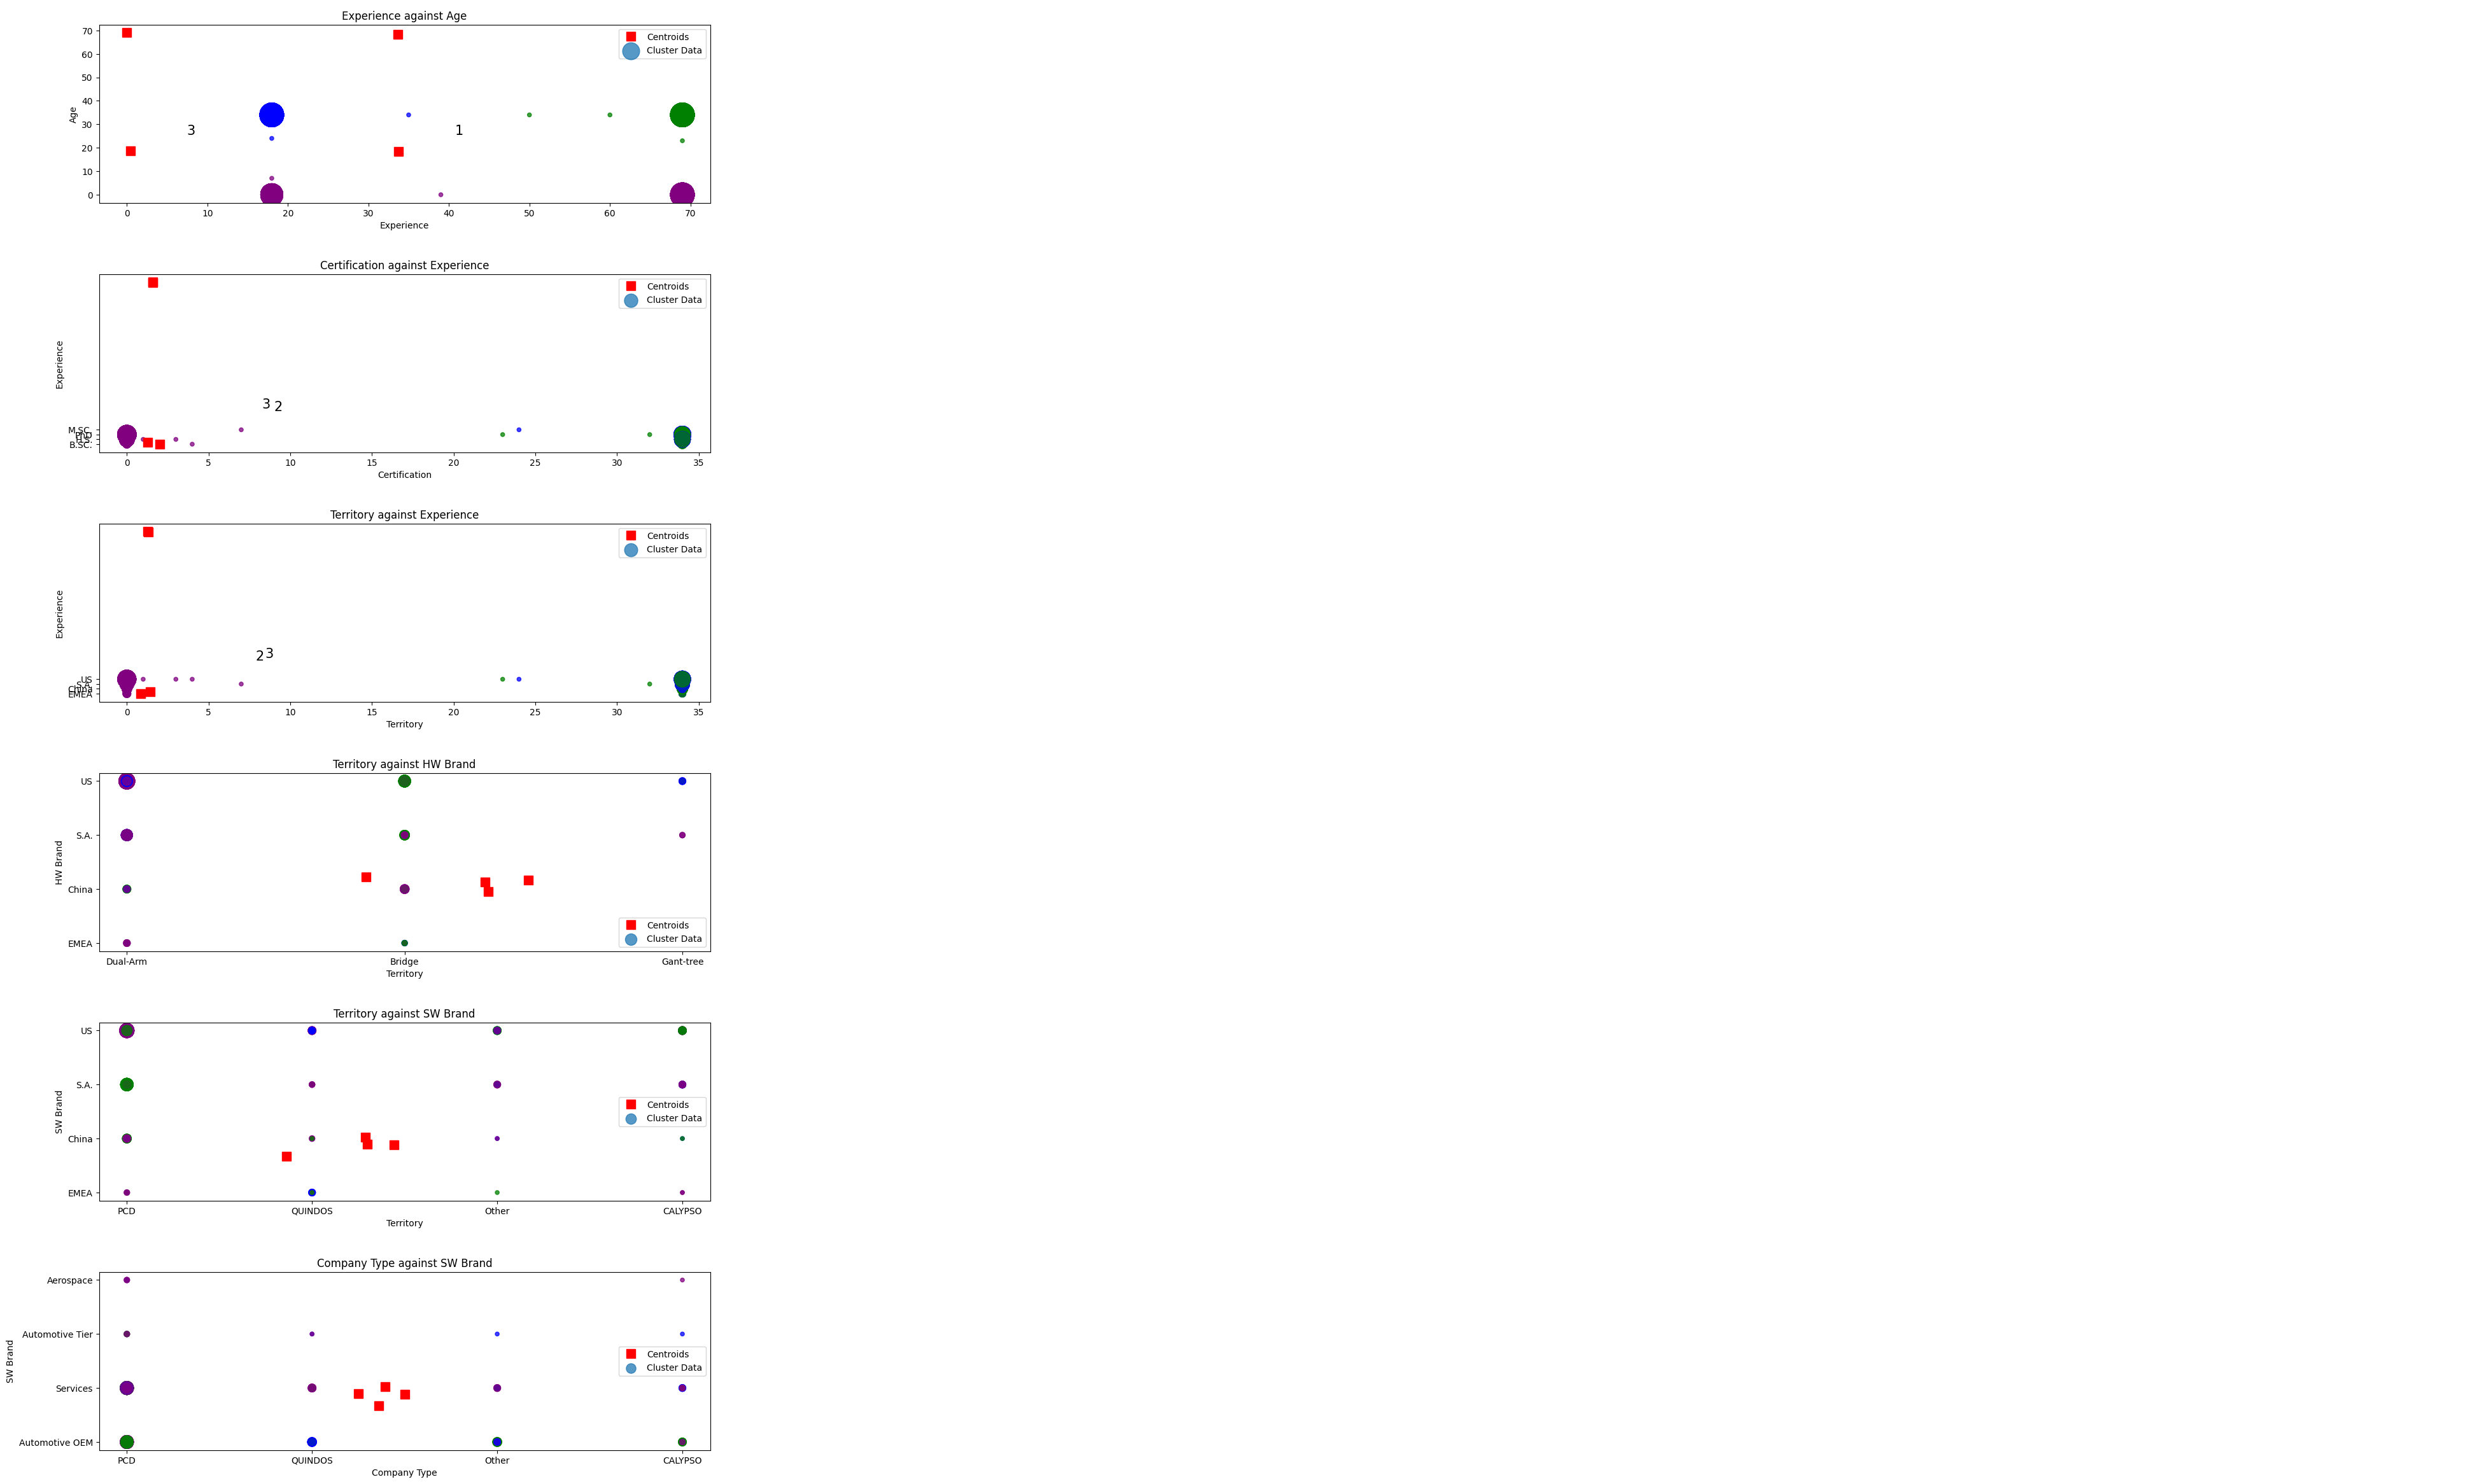

In [49]:
# 3 - Plot relationship among features
import matplotlib
colors = ['green', 'blue', 'purple']

#columns = ['Age Bin', 'Experience Bin', 'Certification', 'Territory', 'HW Brand', 'SW Brand', 'Company Type']
rels = [('Age', 'Experience'), ('Experience', 'Certification'), ('Experience', 'Territory'), ('HW Brand', 'Territory'), 
     ('SW Brand', 'Territory'), ('SW Brand', 'Company Type')]

n = 4
values = results[n]

plot_relationships(values=values, relationships=rels)

In [31]:
values


{'centroids': array([[68.3       , 33.675     ,  1.575     ,  1.3       ,  0.95      ,
          0.9       ,  1.25      ],
        [18.44736842, 33.73684211,  1.60526316,  1.28947368,  1.13157895,
          1.02631579,  1.39473684],
        [69.        ,  0.        ,  2.        ,  0.86111111,  1.22222222,
          0.66666667,  1.36111111],
        [18.58333333,  0.41666667,  1.27777778,  1.44444444,  1.16666667,
          0.88888889,  1.5       ]]),
 'labels': array([3, 0, 1, 2, 1, 3, 0, 1, 1, 1, 0, 0, 2, 2, 0, 2, 1, 1, 1, 0, 1, 1,
        1, 3, 0, 1, 2, 1, 1, 0, 3, 2, 3, 1, 1, 0, 3, 2, 0, 0, 0, 2, 0, 3,
        3, 2, 3, 1, 1, 1, 1, 0, 2, 1, 2, 3, 0, 1, 0, 2, 2, 3, 0, 2, 0, 3,
        0, 2, 2, 3, 2, 2, 2, 3, 0, 2, 3, 1, 1, 0, 1, 1, 0, 3, 2, 2, 2, 3,
        3, 1, 3, 1, 2, 3, 0, 3, 0, 0, 0, 3, 3, 1, 0, 1, 3, 0, 3, 1, 2, 3,
        0, 2, 2, 3, 0, 3, 0, 1, 1, 2, 2, 2, 3, 2, 3, 0, 1, 2, 0, 1, 3, 2,
        0, 2, 1, 0, 0, 0, 0, 1, 3, 3, 0, 1, 2, 3, 2, 0, 3, 3], dtype=int32),
 'model': KMea